<a href="https://colab.research.google.com/github/ElviraKonovalov/soen471-bigData/blob/main/presentation_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import NearMiss 

In [303]:
file = 'clean_data_label_encoded.csv'
df=  pd.read_csv(file, sep=',');

In [170]:
# extract features and labels
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS','Unnamed: 0'])
X = df

# y.replace(0, 'Non-Fatal', inplace=True)
# y.replace(1, 'Fatal', inplace=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # split data

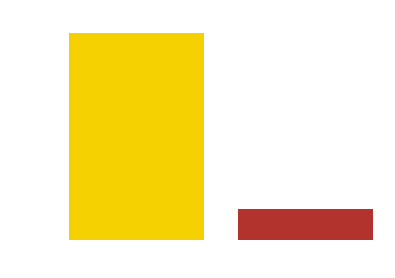

In [71]:
import matplotlib
fig = plt.figure()

ax = fig.add_subplot()

ax.set_xlabel('X-axis ')
ax.set_ylabel('Y-axis ')

ax.title.set_color('white')

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white')  
class_counts = y.value_counts()
classes = class_counts.index.tolist()
class_instance_count = class_counts.values
plt.bar(classes,class_instance_count, color=['#f4d000', '#b2322e'])
plt.title('Accident class distribution')
plt.xlabel('Accident outcome')
plt.ylabel('Number of instances');

In [34]:
forest = RandomForestClassifier(n_estimators=500, random_state=0).fit(X_train, y_train)

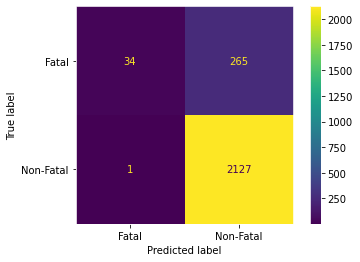

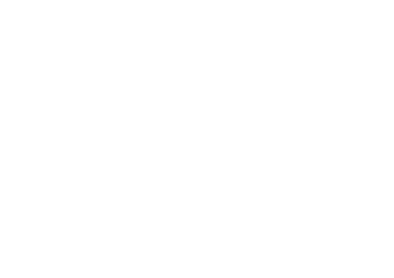

In [72]:
# construct confusion matrix
plot_confusion_matrix(forest, X_test, y_test) 
plt.title('Confusion matrix - Random forest #1')  
plt.show();

In [43]:
# evaluate model
y_pred = forest.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 1   89.04      89.93      89.04      85.03


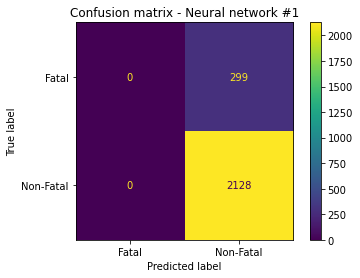

In [42]:
# construct confusion matrix
plot_confusion_matrix(mlp, X_test, y_test)  
plt.title('Confusion matrix - Neural network #1') 
plt.show();

In [44]:
# evaluate model
y_pred = mlp.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 1   87.68      76.88      87.68      81.92


In [171]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

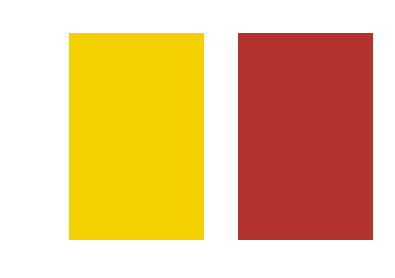

In [147]:
import matplotlib
fig = plt.figure()

ax = fig.add_subplot()

ax.set_xlabel('X-axis ')
ax.set_ylabel('Y-axis ')

ax.title.set_color('white')

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white')  
class_counts = y.value_counts()
classes = class_counts.index.tolist()
class_instance_count = class_counts.values
plt.bar(classes,class_instance_count, color=['#f4d000', '#b2322e'])
plt.title('Accident class distribution')
plt.xlabel('Accident outcome')
plt.ylabel('Number of instances');

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [127]:
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

In [173]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0).fit(X_train, y_train)

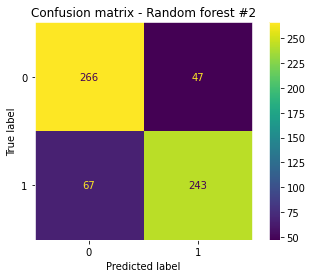

In [174]:
plot_confusion_matrix(forest, X_test, y_test) 
plt.title('Confusion matrix - Random forest #2')  
plt.show();

In [185]:
start_time = time.time()
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

feature_names = list(X.columns) # get feature names
forest_importances = pd.Series(result.importances_mean, index=feature_names)


Elapsed time to compute the importances: 63.964 seconds


Text(0.5, 0, 'Feature importance score')

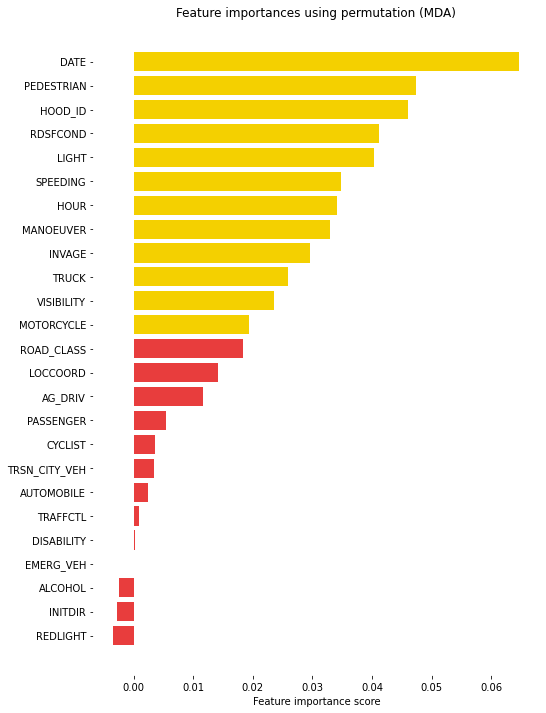

In [279]:

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 12))
clrs = ['#e83d3d' if (x < 0.019) else '#f4d000' for x in result.importances_mean[sorted_idx] ]
plt.barh( np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx], color=clrs)

plt.title("Feature importances using permutation (MDA)")
plt.xlabel("Feature importance score")
# plt.barh( np.array(feature_names)[sorted_idx][11:], result.importances_std[sorted_idx][11:], color='#e83d3d')
# plt.xticks(range(X.shape[1]), rotation=20, fontsize = 8)

In [ ]:

plt.barh( x, y)

In [135]:
# evaluate model
y_pred = forest.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 1   94.22      94.49      94.22      94.21


In [117]:
mlp = MLPClassifier(learning_rate='adaptive', max_iter=100).fit(X_train, y_train)

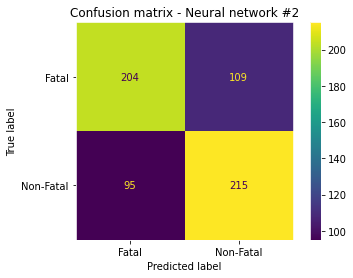

In [119]:
plot_confusion_matrix(mlp, X_test, y_test) 
plt.title('Confusion matrix - Neural network #2')  
plt.show();

In [121]:
# evaluate model
y_pred = mlp.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 1", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 1   67.26       67.3      67.26      67.24


In [304]:
y = df['ACCLASS']

df = df.drop(columns=['ACCLASS','Unnamed: 0', 'AG_DRIV', 'ALCOHOL', 'AUTOMOBILE', 'CYCLIST', 'DISABILITY', 'EMERG_VEH',
                      'INITDIR', 'LOCCOORD', 'MOTORCYCLE', 'PASSENGER', 'REDLIGHT', 'TRAFFCTL', 'TRSN_CITY_VEH'])
X = df

y.replace(0, 'Non-Fatal', inplace=True)
y.replace(1, 'Fatal', inplace=True)

In [305]:
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# find best parameters for a random forest and train using best found estimator
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5, 10, 13],
    'min_samples_leaf': [1, 2, 5, 8, 13]
}

forest = GridSearchCV(RandomForestClassifier(random_state=0), params)
forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 8, 13],
                         'min_samples_split': [2, 4, 5, 10, 13],
                         'n_estimators': [100, 500, 1000]})

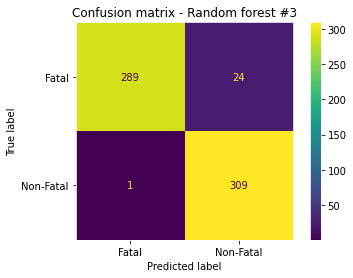

In [306]:
plot_confusion_matrix(forest, X_test, y_test) 
plt.title('Confusion matrix - Random forest #3')   
plt.show();

In [307]:
y_pred = forest.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 3", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 3   95.99      96.24      95.99      95.98


In [299]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
nn = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
nn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

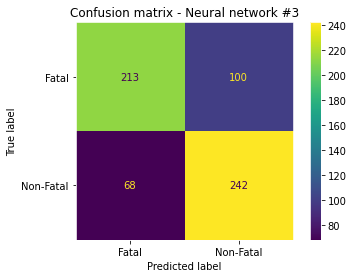

In [300]:
plot_confusion_matrix(nn, X_test, y_test) 
plt.title('Confusion matrix - Neural network #3')   
plt.show();

In [302]:
y_pred = nn.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("MODEL", "ACCURACY", "PRECISION", "RECALL", "F1"))
print("{0:17} {1:10} {2:10} {3:10} {4:}".format("----------------", "---------", "---------", "---------", "---------"))
print("{0:17} {1:} {2:10} {3:10} {4:10}".format("random forest 3", accuracy, precision, recall, f1))

----------------  ---------  ---------  ---------  ---------
MODEL             ACCURACY   PRECISION  RECALL     F1
----------------  ---------  ---------  ---------  ---------
random forest 3   73.03      73.29      73.03      72.97
